In [249]:
import pandas as pd
import numpy as np
import random as rn
from sklearn.datasets import make_regression
import requests
from io import BytesIO
import zipfile
import os
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import joblib

In [250]:
url="https://github.com/dbdmg/data-science-lab/raw/master/datasets/NYC_Airbnb.zip"

In [251]:
# Download the ZIP file content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract all files from the zip archive in memory
    with zipfile.ZipFile(BytesIO(response.content)) as zip_ref:
        # Extract all files to a temporary location
        zip_ref.extractall('pd')  # Change 'path/to/extract' to your desired extraction location

        # Get the list of CSV files in the extracted folder
        tsv_files = [f for f in zip_ref.namelist() if f.endswith('.tsv')]

else:
    print(f"Failed to download the ZIP file. Status code: {response.status_code}")

In [252]:
# Obtener la ruta del script actual
directorio_actual = os.getcwd()

# Construir la ruta al archivo CSV relativa al directorio actual
ruta_csv = os.path.join(directorio_actual, 'pd', 'NYC_Airbnb\development.csv')

bd=pd.read_csv(ruta_csv)

In [253]:
bd.head()#The las review should be a datatype = date 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12783632,NYC Mini Hotel,57230304,Imanuelly,Queens,Elmhurst,40.74037,-73.88610,Private room,75,1,2,2019-05-26,0.92,3,351
1,3463385,Gorgeous room in Manhattan,10698270,Evgenia,Manhattan,Upper East Side,40.76717,-73.95532,Private room,95,1,202,2019-05-27,3.31,2,263
2,17572926,Great 1 Bedroom on Upper East,36578169,James,Manhattan,Upper East Side,40.77984,-73.94725,Entire home/apt,130,2,0,NaN,NaN,1,0
3,33913644,"Modern and bright 2Bed 2Bath Bushwick, Brooklyn",50981314,Ofier,Brooklyn,Bushwick,40.70205,-73.91338,Entire home/apt,150,2,4,2019-07-07,1.64,1,89
4,9405895,Stylish and zen Brooklyn retreat,48775347,Mathieu,Brooklyn,Fort Greene,40.68914,-73.97853,Entire home/apt,325,3,16,2019-04-20,0.42,1,103


In [254]:
bd.shape

(39116, 16)

In [255]:
bd.dtypes #The last review is not a date type but we could also remoe it due to is not a time series problem

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [256]:
bd.isna().sum()
#Why there are empty names?

id                                   0
name                                13
host_id                              0
host_name                           19
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       8041
reviews_per_month                 8041
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [257]:
bd[bd['name'].isna()] #The airbnbs with the name empty have reviews

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
3881,22275821,NaN,49662398,Kathleen,Brooklyn,Bushwick,40.69546,-73.92741,Entire home/apt,110,4,5,2018-08-13,0.27,1,0
5097,10052289,NaN,49522403,Vanessa,Brooklyn,Brownsville,40.66409,-73.92314,Private room,50,3,3,2016-08-18,0.07,1,362
7542,12797684,NaN,69715276,Yan,Manhattan,Upper West Side,40.79843,-73.96404,Private room,100,1,0,NaN,NaN,2,0
9087,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
9351,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN,NaN,1,0
11089,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN,NaN,1,0
11648,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN,NaN,5,0
21297,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN,NaN,1,0
21913,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,2016-01-05,0.02,1,0
23695,12988898,NaN,71552588,Andrea,Bronx,Fordham,40.86032,-73.88493,Shared room,130,1,0,NaN,NaN,1,365


In [258]:
bd[bd['host_name'].isna()] #We could drop the name and the host_name to only work with the host_id

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
607,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,2015-07-01,0.02,1,0
1690,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,2015-10-20,0.02,1,0
3669,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN,NaN,1,0
4619,23660605,Private Bedroom w/ Balcony view of Central Park,177146433,NaN,Manhattan,East Harlem,40.79766,-73.94824,Private room,139,1,6,2018-08-12,0.46,1,0
6798,21901156,Best Deal! Lovely place in Manhattan! Time Squ...,159156636,NaN,Manhattan,Hell's Kitchen,40.75656,-73.99063,Private room,120,1,109,2019-01-01,5.97,3,0
11048,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,2019-07-08,0.45,1,88
12794,25180572,Beautiful Cozy Studio Apt. UWS,119609345,NaN,Manhattan,Upper West Side,40.77701,-73.97667,Entire home/apt,180,4,0,NaN,NaN,1,0
13966,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,2015-08-01,0.02,1,0
15744,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN,NaN,1,0
16001,21787094,Spacious and Bright Midtown East Apartment,415290,NaN,Manhattan,Upper East Side,40.76436,-73.96836,Entire home/apt,325,1,0,NaN,NaN,1,0


In [259]:
bd.shape

(39116, 16)

In [260]:
bd[bd['last_review'].isna()]['number_of_reviews'].sum() #The null data of the last_review is because they do not have reviews. As the Last_review will be drop, the reviews_per_month will be filled with 0

0

In [261]:
bd2=bd.copy()
bd2.drop(['id','host_id','host_name','latitude','longitude','last_review', 'name'],axis=1, inplace=True)

In [262]:
bd2=bd2.fillna(0)

In [263]:
bd2.isna().sum() #The fill na was successfull

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [264]:
bd2.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Queens,Elmhurst,Private room,75,1,2,0.92,3,351
1,Manhattan,Upper East Side,Private room,95,1,202,3.31,2,263
2,Manhattan,Upper East Side,Entire home/apt,130,2,0,0.00,1,0
3,Brooklyn,Bushwick,Entire home/apt,150,2,4,1.64,1,89
4,Brooklyn,Fort Greene,Entire home/apt,325,3,16,0.42,1,103


In [265]:
bd2['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [266]:
bd2['neighbourhood_group'].nunique() #The data set divide the the neighbourhoods in 5 groups

5

In [267]:
bd2['neighbourhood'].nunique() #There are 221 neighnourhoods

221

In [268]:
bd2['room_type'].nunique() #There are 3 types of room

3

<AxesSubplot: >

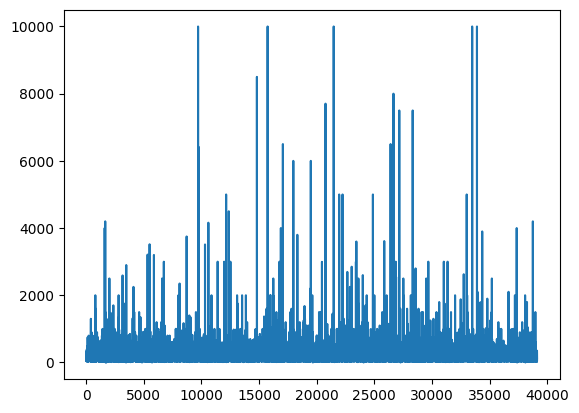

In [269]:
(bd2['price']).plot() #There are many "atypical values", this is because we have not normalized the data
#Some values are really high and others really low, this could be a problem

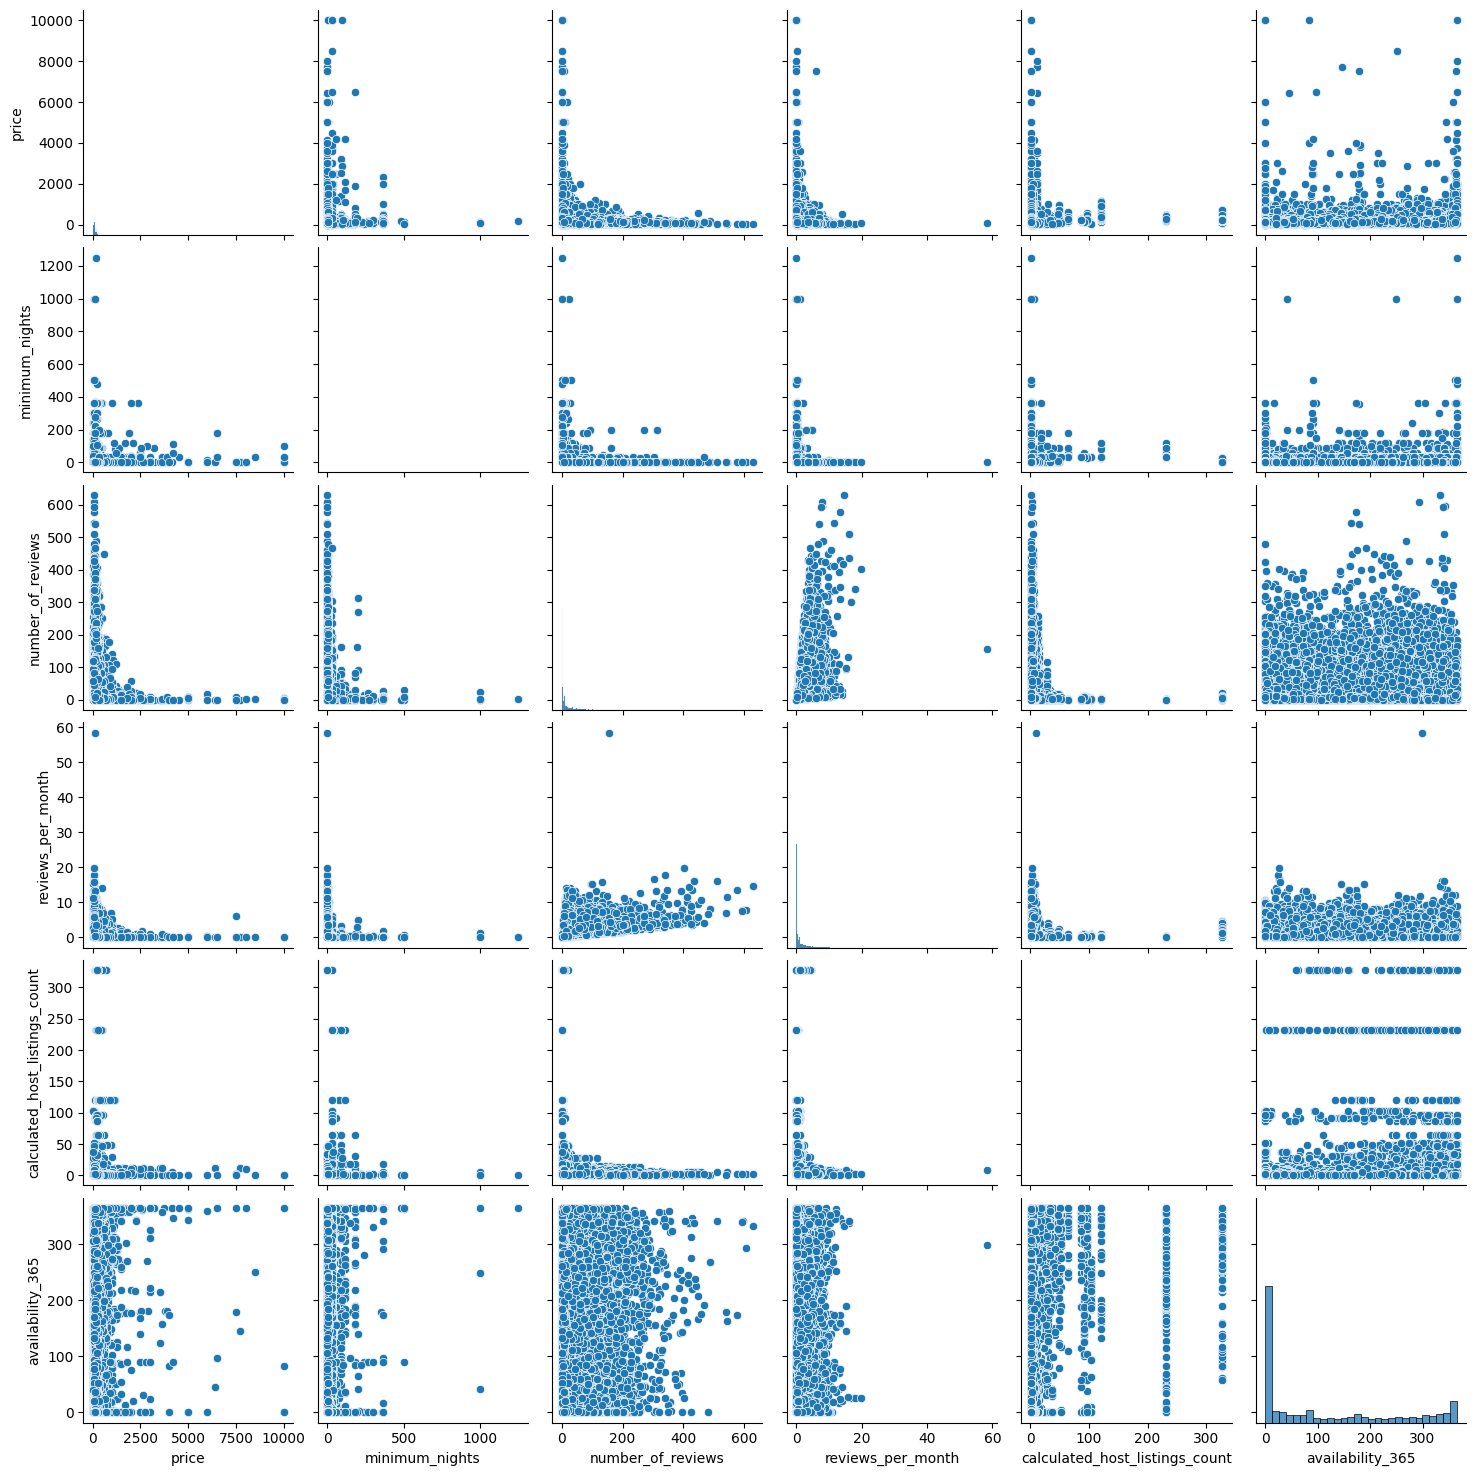

In [270]:
sns.pairplot(bd2) #The number of reviews with respect to the price does not have a clear relation and the reviews_per_month look inverse proportional
#Most of the porperties does not have availability
#We could drop the number_of_reviews and work with the reviews_per_month

In [271]:
corr = bd2.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\alejandrs\AppData\Local\Temp\ipykernel_10708\2063772596.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.044238,-0.048254,-0.053285,0.055070,0.082667
minimum_nights,0.044238,1.000000,-0.079918,-0.125229,0.131414,0.143192
number_of_reviews,-0.048254,-0.079918,1.000000,0.590093,-0.072944,0.171203
reviews_per_month,-0.053285,-0.125229,0.590093,1.000000,-0.049069,0.159889
calculated_host_listings_count,0.055070,0.131414,-0.072944,-0.049069,1.000000,0.226814
availability_365,0.082667,0.143192,0.171203,0.159889,0.226814,1.000000


In [272]:
#Price according to the neghborhood_group
# create dataset
base = bd2.groupby(['neighbourhood_group'])[['price']].sum().reset_index()

# Graph
fig = px.bar(base, x = 'neighbourhood_group', y='price', barmode = 'group', 
             title= '<b>Price according to the neighborhood group<b>',
             color_discrete_sequence=px.colors.qualitative.Antique) #este sirve para colocarle los colorsitos que uno quiere a las barras

# details of the graph
fig.update_layout(
    xaxis_title = 'Neighborhood',
    yaxis_title = 'Price',
    template = 'simple_white',
    title_x = 0.5)

fig.show() #The expensiest neigbourhood is Manhattan and the chepeast is Staten Island

bar   (0.0, 0.0)  value  17188.0
bar   (1000.0, 0.0)  value  111.0
bar   (2000.0, 0.0)  value  30.0
bar   (3000.0, 0.0)  value  16.0
bar   (4000.0, 0.0)  value  3.0
bar   (5000.0, 0.0)  value  1.0
bar   (6000.0, 0.0)  value  5.0
bar   (7000.0, 0.0)  value  2.0
bar   (8000.0, 0.0)  value  1.0
bar   (9000.0, 0.0)  value  3.0


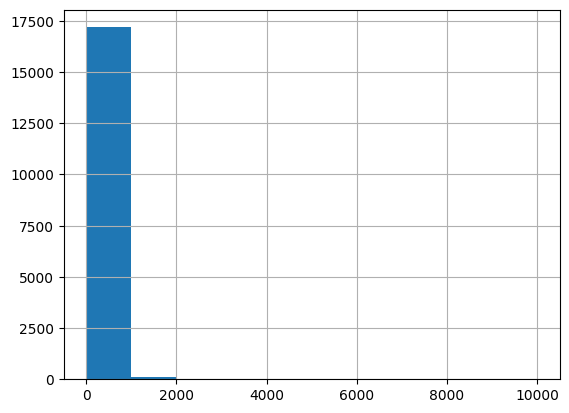

In [273]:
#We are going to detect the outliers for each neighbourhood and drop them
data=bd2[bd2['neighbourhood_group']=='Manhattan']['price'] #Max to leave= 1000
data.hist()
ax=plt.gca()
p=ax.patches
for i in p:
    print("bar  ",i.get_xy(), " value ",i.get_height() ) #We could drop the values higher than 1000

In [274]:
Manhattan=bd2[bd2['neighbourhood_group']=='Manhattan']
Manhattan=Manhattan[Manhattan['price']<=1000]

bar   (0.0, 0.0)  value  16019.0
bar   (1000.0, 0.0)  value  32.0
bar   (2000.0, 0.0)  value  12.0
bar   (3000.0, 0.0)  value  1.0
bar   (4000.0, 0.0)  value  4.0
bar   (5000.0, 0.0)  value  3.0
bar   (6000.0, 0.0)  value  0.0
bar   (7000.0, 0.0)  value  1.0
bar   (8000.0, 0.0)  value  1.0
bar   (9000.0, 0.0)  value  1.0


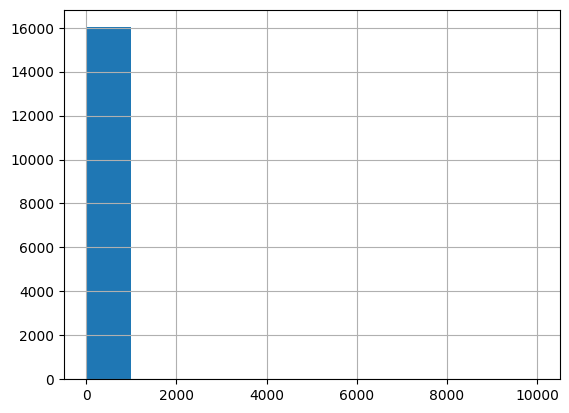

In [275]:
data=bd2[bd2['neighbourhood_group']=='Brooklyn']['price']
data.hist()
ax=plt.gca()
p=ax.patches
for i in p:
    print("bar  ",i.get_xy(), " value ",i.get_height() ) #We could drop the values higher than 1000

In [276]:
Brooklyn=bd2[bd2['neighbourhood_group']=='Brooklyn']
Brooklyn=Brooklyn[Brooklyn['price']<=1000]

bar   (10.0, 0.0)  value  4501.0
bar   (1009.0, 0.0)  value  7.0
bar   (2008.0, 0.0)  value  2.0
bar   (3007.0, 0.0)  value  0.0
bar   (4006.0, 0.0)  value  0.0
bar   (5005.0, 0.0)  value  0.0
bar   (6004.0, 0.0)  value  0.0
bar   (7003.0, 0.0)  value  0.0
bar   (8002.0, 0.0)  value  0.0
bar   (9001.0, 0.0)  value  1.0


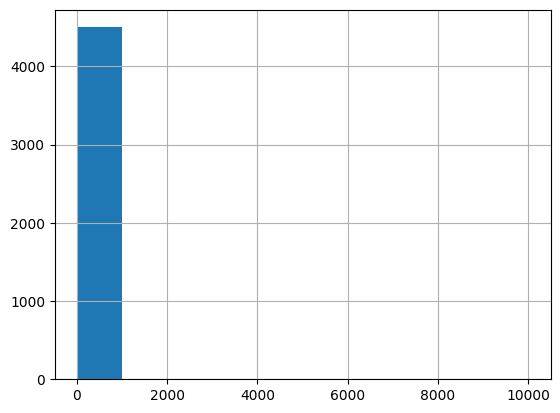

In [277]:
data=bd2[bd2['neighbourhood_group']=='Queens']['price']
data.hist()
ax=plt.gca()
p=ax.patches
for i in p:
    print("bar  ",i.get_xy(), " value ",i.get_height() ) #We could drop the values higher than 1009

In [278]:
Queens=bd2[bd2['neighbourhood_group']=='Queens']
Queens=Queens[Queens['price']<=1009]

bar  

 (0.0, 0.0)  value  843.0
bar   (250.0, 0.0)  value  24.0
bar   (500.0, 0.0)  value  5.0
bar   (750.0, 0.0)  value  1.0
bar   (1000.0, 0.0)  value  0.0
bar   (1250.0, 0.0)  value  0.0
bar   (1500.0, 0.0)  value  0.0
bar   (1750.0, 0.0)  value  0.0
bar   (2000.0, 0.0)  value  0.0
bar   (2250.0, 0.0)  value  1.0


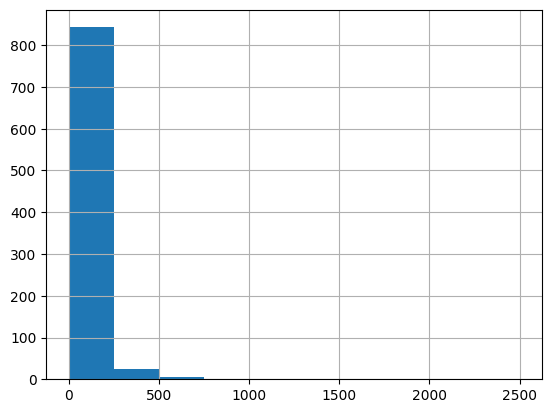

In [279]:
data=bd2[bd2['neighbourhood_group']=='Bronx']['price']
data.hist()
ax=plt.gca()
p=ax.patches
for i in p:
    print("bar  ",i.get_xy(), " value ",i.get_height() ) #We could drop the values higher than 250

In [280]:
Bronx=bd2[bd2['neighbourhood_group']=='Bronx']
Bronx=Bronx[Bronx['price']<=250]

bar   (13.000000000000057, 0.0)  value  291.0
bar   (511.7, 0.0)  value  4.0
bar   (1010.4000000000001, 0.0)  value  1.0
bar   (1509.1, 0.0)  value  0.0
bar   (2007.8000000000002, 0.0)  value  0.0
bar   (2506.5, 0.0)  value  0.0
bar   (3005.2, 0.0)  value  0.0
bar   (3503.9, 0.0)  value  0.0
bar   (4002.5999999999995, 0.0)  value  0.0
bar   (4501.299999999999, 0.0)  value  1.0


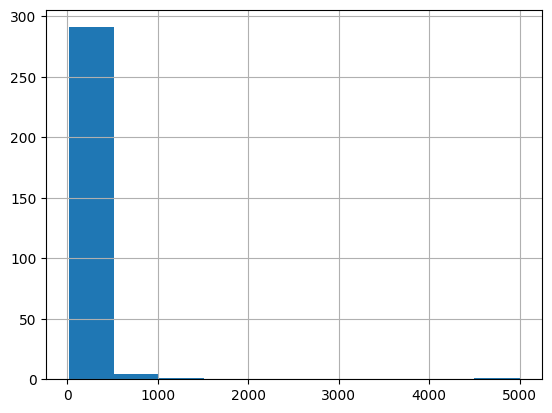

In [281]:
data=bd2[bd2['neighbourhood_group']=='Staten Island']['price']#Max to leave= 500
data.hist()
ax=plt.gca()
p=ax.patches
for i in p:
    print("bar  ",i.get_xy(), " value ",i.get_height() ) #We could drop the values higher than 511

In [282]:
Staten_Island=bd2[bd2['neighbourhood_group']=='Staten Island']
Staten_Island=Staten_Island[Staten_Island['price']<=511.7]

Conncat the neighbourhoods_groups

In [283]:
bd2=pd.concat([Manhattan,Brooklyn],ignore_index=True)
bd2=pd.concat([bd2,Queens],ignore_index=True)
bd2=pd.concat([bd2,Bronx],ignore_index=True)
bd2=pd.concat([bd2,Staten_Island],ignore_index=True)

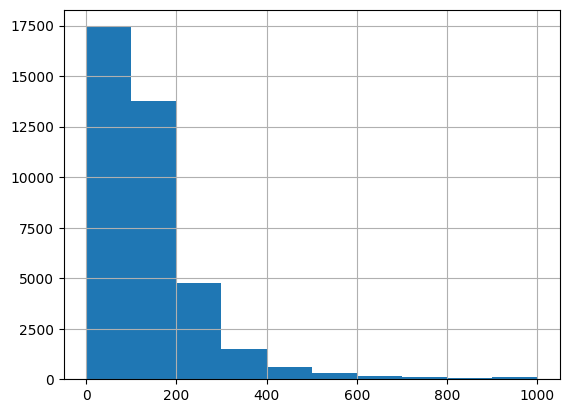

In [284]:
bd2['price'].hist()
plt.show()

In [285]:
bd3=bd2.drop(['minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','neighbourhood'], axis=1) #The bd is without any numerical data
bd4=bd2.drop(['minimum_nights','number_of_reviews','reviews_per_month','neighbourhood'], axis=1) #Due to the low correlation between the numerical data and the price we are going to creat a database with just the calculated_host_listings_count and the availability_365

In [286]:
#bd3.head()
bd4.head()

,neighbourhood_group,room_type,price,calculated_host_listings_count,availability_365
0,Manhattan,Private room,95,2,263
1,Manhattan,Entire home/apt,130,1,0
2,Manhattan,Entire home/apt,220,2,29
3,Manhattan,Private room,55,1,341
4,Manhattan,Private room,100,2,52


In [287]:
bdt=bd4.drop(['price'],axis=1) #This bd is to make the onehot to the test set

In [288]:
bdt.head(-1)

,neighbourhood_group,room_type,calculated_host_listings_count,availability_365
0,Manhattan,Private room,2,263
1,Manhattan,Entire home/apt,1,0
2,Manhattan,Entire home/apt,2,29
3,Manhattan,Private room,1,341
4,Manhattan,Private room,2,52
...,...,...,...,...
38886,Staten Island,Entire home/apt,1,364
38887,Staten Island,Entire home/apt,1,128
38888,Staten Island,Private room,1,0
38889,Staten Island,Shared room,4,82


In [289]:
test2=joblib.load('test2.pkl')

In [290]:
test2.head()

,neighbourhood_group,room_type,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,6,365
1,Brooklyn,Private room,1,0
2,Manhattan,Private room,1,0
3,Manhattan,Entire home/apt,4,188
4,Brooklyn,Entire home/apt,1,46


In [291]:
bdt=pd.concat([test2,bdt],axis=0)

In [292]:
"""cate=bdt.iloc[:,:2]
one=OneHotEncoder(sparse=False, dtype=int) #If I do not asign int the default is float
X_cate=one.fit_transform(cate)
X_cate=pd.DataFrame(X_cate)
bdt=pd.concat([bdt,X_cate],axis=1)
bdt=bdt.drop(['neighbourhood_group','room_type'],axis=1)"""

"cate=bdt.iloc[:,:2]\none=OneHotEncoder(sparse=False, dtype=int) #If I do not asign int the default is float\nX_cate=one.fit_transform(cate)\nX_cate=pd.DataFrame(X_cate)\nbdt=pd.concat([bdt,X_cate],axis=1)\nbdt=bdt.drop(['neighbourhood_group','room_type'],axis=1)"

Normalizing and onehotencoding the data

In [293]:
cate=bd3.iloc[:,:2]

In [294]:
cate

,neighbourhood_group,room_type
0,Manhattan,Private room
1,Manhattan,Entire home/apt
2,Manhattan,Entire home/apt
3,Manhattan,Private room
4,Manhattan,Private room
...,...,...
38887,Staten Island,Entire home/apt
38888,Staten Island,Private room
38889,Staten Island,Shared room
38890,Staten Island,Entire home/apt


In [295]:
one=OneHotEncoder(sparse=False, dtype=int) #If I do not asign int the default is float
X_cate=one.fit_transform(cate)

In [296]:
X_cate=pd.DataFrame(X_cate)

In [297]:
bd3=pd.concat([bd3,X_cate],axis=1)
bd3=bd3.drop(['neighbourhood_group','room_type'],axis=1)
#The first 5 one are for the meighbourhood_group, the next 221 are the neighbourhoods and the las 3 ones are the room_type
bd4=pd.concat([bd4,X_cate],axis=1)
bd4=bd4.drop(['neighbourhood_group','room_type'],axis=1)
#
#How are divided the data? 


Naming the columns with its respective category

**BD3**

In [298]:
bd3.head()

,price,0,1,2,3,4,5,6,7
0,95,0,0,1,0,0,0,1,0
1,130,0,0,1,0,0,1,0,0
2,220,0,0,1,0,0,1,0,0
3,55,0,0,1,0,0,0,1,0
4,100,0,0,1,0,0,0,1,0


In [299]:
x=bd3.iloc[:,1:].values
y=bd3.iloc[:,0].values

In [300]:
from sklearn.model_selection import KFold

# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(x,y,test_size=0.2)
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split
for train_indices, validation_indices in kf.split(X_train_valid):
    X_train3 = X_train_valid[train_indices]
    X_valid3 = X_train_valid[validation_indices] #The valid values are use to find the best hyperparameters
    y_train3 = y_train_valid[train_indices]
    y_valid3 = y_train_valid[validation_indices]

In [217]:
#In this bd won't be necesary normalize the data because we just have one hot data
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg=LinearRegression(fit_intercept=True)
reg.fit(X_train3,y_train3)
y_pred=reg.predict(X_valid3)
mse=mean_squared_error(y_valid3,y_pred)
mse #Sigue siendo un error muy bajo

10436.200769800267

In [301]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=1)
x_poly=poly.fit_transform(X_train3)
x_poly_val=poly.fit_transform(X_valid3)
lr=LinearRegression()
lr.fit(x_poly,y_train3)
y_pred=lr.predict(x_poly_val)
mean_squared_error(y_valid3,y_pred)

9023.285946940732

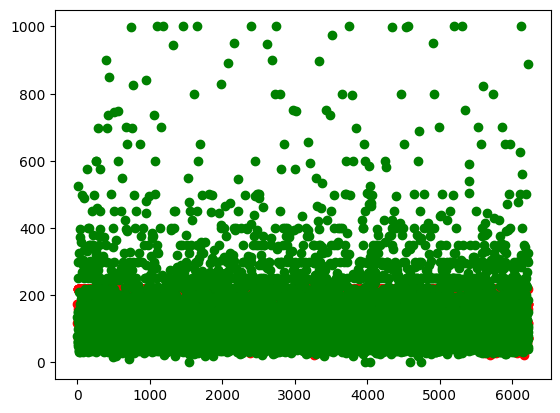

In [302]:
plt.scatter(range(len(y_pred)),y_pred, color='red')
plt.scatter(range(len(y_valid)),y_valid, color='green') #There are 8 data that are not in the correct limit
#plt.ylim(0, 8000) # In most of the data the predictions apparently are close to the real value
plt.show() #Althought the mse is similar to the result of the las model in the graph we can observe that the behavior is completly diferent and discard this option.
#This bd is discard

In [219]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(X_train3, y_train3)
y_pred=rc.predict(X_valid3)
mean_squared_error(y_valid3,y_pred)

10792.277724204436

In [220]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train3, y_train3)
y_pred=sv.predict(X_valid3)
mean_squared_error(y_valid3,y_pred)

10792.277724204436

In [221]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor()
regr.fit(X_train3, y_train3)
regr.predict(X_valid3)
mean_squared_error(y_valid3,y_pred)

10792.277724204436

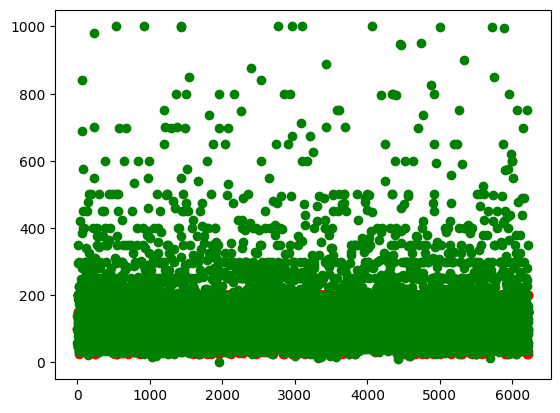

In [222]:
plt.scatter(range(len(y_pred)),y_pred, color='red')
plt.scatter(range(len(y_valid3)),y_valid3, color='green') #There are 8 data that are not in the correct limit
#plt.ylim(0, 8000) # In most of the data the predictions apparently are close to the real value
plt.show()

**BD4**

Normalization

In [223]:
bd4.head()

,price,calculated_host_listings_count,availability_365,0,1,2,3,4,5,6,7
0,95,2,263,0,0,1,0,0,0,1,0
1,130,1,0,0,0,1,0,0,1,0,0
2,220,2,29,0,0,1,0,0,1,0,0
3,55,1,341,0,0,1,0,0,0,1,0
4,100,2,52,0,0,1,0,0,0,1,0


In [303]:
x=bd4.iloc[:,1:].values
y=bd4.iloc[:,0].values

In [304]:
from sklearn.model_selection import KFold

# Split the datasets into two:
# - X_train_valid: the dataset used for the k-fold cross-validation
# - X_test: the dataset used for the final testing (this will NOT
# be seen by the classifier during the training/validation phases)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(x,y,test_size=0.2)
kf = KFold(5) # 5-fold cross-validation
# X and y are the arrays to be split
for train_indices, validation_indices in kf.split(X_train_valid):
    X_train = X_train_valid[train_indices]
    X_valid = X_train_valid[validation_indices] #The valid values are use to find the best hyperparameters
    y_train = y_train_valid[train_indices]
    y_valid = y_train_valid[validation_indices]

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg=LinearRegression(fit_intercept=True)
reg.fit(X_train,y_train)
y_pred=reg.predict(X_valid)
mse=mean_squared_error(y_valid,y_pred)
mse

9736.698180891992

In [305]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=1)
x_poly=poly.fit_transform(X_train)
x_poly_val=poly.fit_transform(X_valid)
lr=LinearRegression()
lr.fit(x_poly,y_train)
y_pred=lr.predict(x_poly_val)
mean_squared_error(y_valid,y_pred)

9567.715142822517

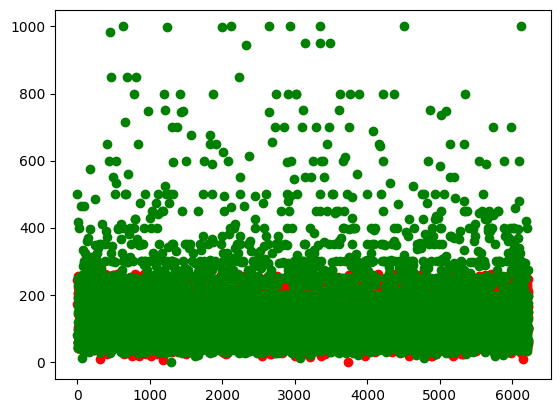

In [306]:
plt.scatter(range(len(y_pred)),y_pred, color='red')
plt.scatter(range(len(y_valid)),y_valid, color='green') #There are 8 data that are not in the correct limit
#plt.ylim(0, 8000) # In most of the data the predictions apparently are close to the real value
plt.show() #Althought the mse is similar to the result of the las model in the graph we can observe that the behavior is completly diferent and discard this option.
#This bd is discard

In [228]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(X_train, y_train)
y_pred=rc.predict(X_valid)
mean_squared_error(y_valid,y_pred)

14864.61218257795

In [229]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train, y_train)
y_pred=sv.predict(X_valid)
mean_squared_error(y_valid,y_pred)

14244.499357119897

In [230]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor()
regr.fit(X_train, y_train)
regr.predict(X_valid)
mean_squared_error(y_valid,y_pred)

14244.499357119897

Now the model of this bd but with the normalization

In [231]:
from sklearn.preprocessing import StandardScaler
zscore=StandardScaler()
X_train_z=zscore.fit_transform(X_train)
X_valid_z=zscore.transform(X_valid)

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg=LinearRegression(fit_intercept=True)
reg.fit(X_train_z,y_train)
y_pred=reg.predict(X_valid_z)
mse=mean_squared_error(y_valid,y_pred)

In [233]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=1)
x_poly=poly.fit_transform(X_train_z)
x_poly_val=poly.fit_transform(X_valid_z)
lr=LinearRegression()
lr.fit(x_poly,y_train)
y_pred=lr.predict(x_poly_val)
mean_squared_error(y_valid,y_pred)

9737.635086838483

In [234]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier()
rc.fit(X_train_z, y_train)
y_pred=rc.predict(X_valid_z)
mean_squared_error(y_valid,y_pred)

13981.26968820315

In [235]:
from sklearn import svm
sv = svm.SVC()
sv.fit(X_train_z, y_train)
y_pred=sv.predict(X_valid_z)
mean_squared_error(y_valid,y_pred)

10914.17663130826

In [236]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor()
regr.fit(X_train_z, y_train)
regr.predict(X_valid_z)
mean_squared_error(y_valid,y_pred)

c:\Users\alejandrs\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



10914.17663130826

In [237]:
mse

9737.360027023044

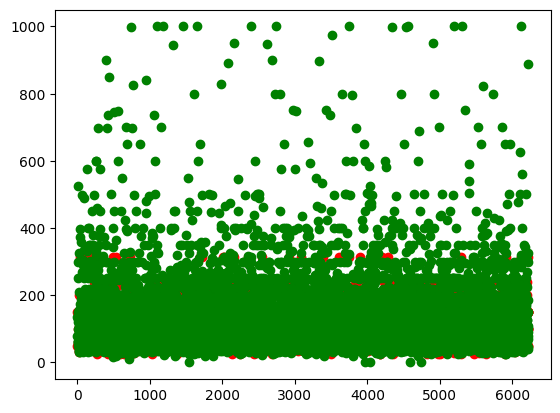

In [238]:
plt.scatter(range(len(y_pred)),y_pred, color='red')
plt.scatter(range(len(y_valid)),y_valid, color='green') #There are 8 data that are not in the correct limit
#plt.ylim(0, 8000) # In most of the data the predictions apparently are close to the real value
plt.show() #Althought the mse is similar to the result of the las model in the graph we can observe that the behavior is completly diferent and discard this option.
#This bd is discard

**Hyperparameters**

The best models until now are the bd3 with svm and the bd4 with polynomial

In [239]:
from sklearn.model_selection import ParameterGrid
params = {
"fit_intercept":[True,False],
"positive":[True,False]
}

max_mse = 1000000
best_config = None

for config in ParameterGrid(params):
    
    poly=PolynomialFeatures(degree=1)
    x_poly=poly.fit_transform(X_train)
    x_poly_val=poly.fit_transform(X_valid)
    lr=LinearRegression(**config)
    lr.fit(x_poly,y_train)
    y_pred=lr.predict(x_poly_val)
    val=mean_squared_error(y_valid,y_pred)

    if val < max_mse:
            max_mse = val
            best_config = config

In [240]:
print("Best Configuration:")
for key, value in best_config.items():
    print(f"{key}: {value}")
print(f"Best mse: {max_mse:.4f}")

Best Configuration:
fit_intercept: False
positive: True
Best mse: 9736.5663


The best model is the one PolynomialFeatures(degree=1) from bd4 and Best Configuration:
fit_intercept: False
positive: True
Best mse: 8776.3318

In [241]:
poly=PolynomialFeatures(degree=1)
x_poly=poly.fit_transform(X_train)


In [242]:
model=LinearRegression(fit_intercept=False,positive=True)
model.fit(x_poly,y_train)

LinearRegression(fit_intercept=False, positive=True)

In [243]:
# Save the trained model
joblib.dump(model, 'trained_model.pkl')

['trained_model.pkl']

In [244]:
params = {
"kernel":['rbf','poly','sigmoid']
}

max_mse = 1000000
best_config = None

for config in ParameterGrid(params):

    sv = svm.SVC(**config)
    sv.fit(X_train3, y_train3)
    y_pred=sv.predict(X_valid3)
    val=mean_squared_error(y_valid3,y_pred)

    if val < max_mse:
            max_mse = val
            best_config = config

In [245]:
print("Best Configuration:")
for key, value in best_config.items():
    print(f"{key}: {value}")
print(f"Best mse: {max_mse:.4f}")

Best Configuration:
kernel: rbf
Best mse: 10792.2777
